In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file imports
file_path = '../data/processed/forecasts_pmafe_v2.csv'

# Import marius_eda data
df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,...,announce_date_actual,forecast_horizon,mean_forecast_horizon_days,fpedats_year,anndats_year,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,analyst_count
0,54,0000,TLMR,TALMER BANCORP,258,8675,0.89,2015-12-31,2015-12-23,2015-10-30,...,2016-01-26,62 days,112,2015,2015,0.13,0.146667,0.166786,-0.120628,28
1,27,0000,TLMR,TALMER BANCORP,952,50789,1.14,2014-12-31,2014-11-08,2014-11-07,...,2015-01-30,54 days,182,2014,2014,0.07,0.404000,0.357500,0.130070,28
2,18,0000,TLMR,TALMER BANCORP,1267,71182,1.24,2014-12-31,2014-08-08,2014-08-07,...,2015-01-30,146 days,182,2014,2014,0.03,0.142500,0.357500,-0.601399,28
3,51,0000,TLMR,TALMER BANCORP,1267,71182,0.90,2015-12-31,2015-11-10,2015-10-29,...,2016-01-26,63 days,181,2015,2015,0.12,0.158000,0.166786,-0.052677,28
4,53,0000,TLMR,TALMER BANCORP,2500,72481,0.86,2015-12-31,2015-10-30,2015-10-30,...,2016-01-26,62 days,173,2015,2015,0.16,0.198000,0.166786,0.187152,28


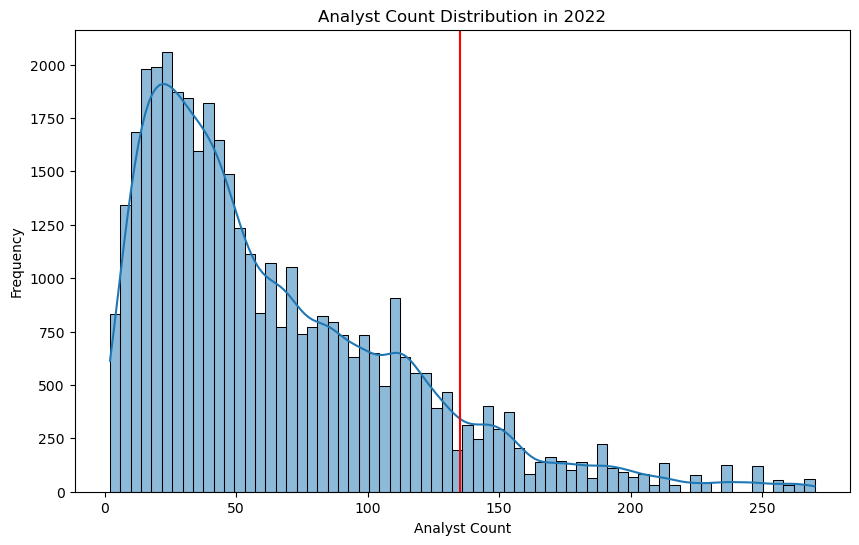

In [11]:
# plot distribution of analyst_count in year 2022 and draw 90% quantile line
plt.figure(figsize=(10, 6))
sns.histplot(df[df['fpedats_year'] == 2022]['analyst_count'], kde=True)
plt.axvline(df[df['fpedats_year'] == 2022]['analyst_count'].quantile(0.9), color='r')
plt.title('Analyst Count Distribution in 2022')
plt.xlabel('Analyst Count')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['analyst_count'].describe()

count    523642.000000
mean         71.698443
std          58.498488
min           2.000000
25%          28.000000
50%          56.000000
75%          99.000000
max         693.000000
Name: analyst_count, dtype: float64

In [9]:
# top 10 % of brokers (estimators) by analyst_count per year (fpedats_year)
df['analyst_count'].quantile(0.9)


150.0

# Ressources / Broker Size
Do analysts of the Top 10 % of brokers (estimators) have a lower pmafe on average?
 __Top 50: > 5.000 analysts__

Dummy variable: set to 1 if analyst i is employed by a firm in the top 10 % during year t, and set to 0 otherwise

In [12]:
def top_10_brokerage(df):
    """
    Function to add a dummy for each analyst that is employed by a brockerage that belongs to the 
    Top 10 % of brokerages by analyst count in year t
    Set to 1 if analyst i is employed by a firm in the top quantile during year t (fpedats_year), and set to 0 otherwise
    broker = df["estimator"]
    analyst = df["analyst"]
    analyst_count = Count of analysts per brokerage in year t
    Output: this function adds a new column to the dataframe called "top_10_brokerage" with the dummy variable
    """
    # setup
    df["top_10_brokerage"] = 0
    # get top 10 % of brokerages by analyst count per year
    top_10 = df.groupby('fpedats_year')['analyst_count'].quantile(0.9)
    # loop through each year
    for year in df['fpedats_year'].unique():
        # get the top 10 % of brokerages by analyst count for the year
        top_10_brokerages = df[df['fpedats_year'] == year][df['analyst_count'] >= top_10[year]]['estimator']
        # set the dummy to 1 if the brokerage is in the top 10 % of brokerages by analyst count
        df.loc[df['estimator'].isin(top_10_brokerages.index), 'top_10_brokerage'] = 1    
    
    return df

In [16]:
top_10 = df.groupby('fpedats_year')['analyst_count'].quantile(0.9)
top_10


fpedats_year
2010    141.0
2011    156.0
2012    164.2
2013    161.0
2014    147.7
2015    153.0
2016    154.0
2017    150.0
2018    144.0
2019    140.0
2020    157.0
2021    140.0
2022    135.0
2023    153.0
Name: analyst_count, dtype: float64

In [13]:
df2 = df.copy()

In [14]:
top_10_brokerage(df2)
df2.head()

C:\Users\mariu\AppData\Local\Temp\ipykernel_27556\3895028047.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_brokerages = df[df['fpedats_year'] == year][df['analyst_count'] >= top_10[year]]['estimator']
C:\Users\mariu\AppData\Local\Temp\ipykernel_27556\3895028047.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_brokerages = df[df['fpedats_year'] == year][df['analyst_count'] >= top_10[year]]['estimator']
C:\Users\mariu\AppData\Local\Temp\ipykernel_27556\3895028047.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_brokerages = df[df['fpedats_year'] == year][df['analyst_count'] >= top_10[year]]['estimator']
C:\Users\mariu\AppData\Local\Temp\ipykernel_27556\3895028047.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_brokerages = df[df['fpedats_year'] == year][df['analyst_count'] >= top_10[year]]['estimator']
C:\Users\mar

,Unnamed: 0,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,...,forecast_horizon,mean_forecast_horizon_days,fpedats_year,anndats_year,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,analyst_count,top_10_brokerage
0,54,0000,TLMR,TALMER BANCORP,258,8675,0.89,2015-12-31,2015-12-23,2015-10-30,...,62 days,112,2015,2015,0.13,0.146667,0.166786,-0.120628,28,0
1,27,0000,TLMR,TALMER BANCORP,952,50789,1.14,2014-12-31,2014-11-08,2014-11-07,...,54 days,182,2014,2014,0.07,0.404000,0.357500,0.130070,28,0
2,18,0000,TLMR,TALMER BANCORP,1267,71182,1.24,2014-12-31,2014-08-08,2014-08-07,...,146 days,182,2014,2014,0.03,0.142500,0.357500,-0.601399,28,0
3,51,0000,TLMR,TALMER BANCORP,1267,71182,0.90,2015-12-31,2015-11-10,2015-10-29,...,63 days,181,2015,2015,0.12,0.158000,0.166786,-0.052677,28,0
4,53,0000,TLMR,TALMER BANCORP,2500,72481,0.86,2015-12-31,2015-10-30,2015-10-30,...,62 days,173,2015,2015,0.16,0.198000,0.166786,0.187152,28,0


In [22]:
# where top_10_brokerage is 1 per fpedats_year
top_broker = df2[df2['top_10_brokerage'] == 1].groupby('fpedats_year')['estimator'].nunique()
top_broker

fpedats_year
2010    34
2011    35
2012    33
2013    33
2014    32
2015    31
2016    28
2017    26
2018    25
2019    24
2020    25
2021    32
2022    30
2023    19
Name: estimator, dtype: int64

In [23]:
count_brokerage = df2.groupby('fpedats_year')['estimator'].nunique()
count_brokerage

fpedats_year
2010    345
2011    345
2012    329
2013    350
2014    475
2015    497
2016    479
2017    458
2018    434
2019    415
2020    407
2021    408
2022    380
2023    248
Name: estimator, dtype: int64

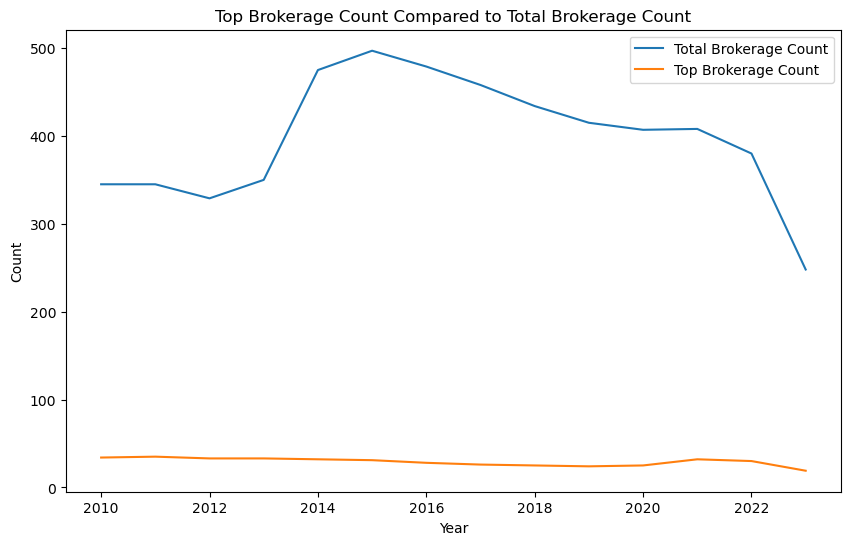

In [24]:
# plot top broker count compared to total broker count
plt.figure(figsize=(10, 6))
plt.plot(count_brokerage, label='Total Brokerage Count')
plt.plot(top_broker, label='Top Brokerage Count')
plt.title('Top Brokerage Count Compared to Total Brokerage Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

## Coverage

How many analysts within broker i cover company j (log)

In [43]:
df2['analyst_following_j'] = df2.groupby(['ibes_ticker_pk','fiscal_period_ending'])['analyst'].transform('count')

In [ ]:
# test
test = df2[(df2['ibes_ticker_pk'] == "AAPL") & (df2['fpedats_year'] == 2018)]
test

In [42]:
# test
estimator_id = 228
coverage = df2[(df2['ibes_ticker_pk'] == "AAPL") & (df2['fpedats_year'] == 2018) & (df2['estimator'] == estimator_id)]
coverage

,Unnamed: 0,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,...,mean_forecast_horizon_days,fpedats_year,anndats_year,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,analyst_count,top_10_brokerage,analyst_following
26059,99535,AAPL,AAPL,APPLE,228,72069,2.750,2018-09-30,2017-11-03,2017-11-03,...,331,2018,2017,0.2275,0.22750,0.130797,0.739341,45,0,45
26133,99708,AAPL,AAPL,APPLE,228,81187,2.935,2018-09-30,2018-09-12,2018-07-31,...,156,2018,2018,0.0425,0.14375,0.130797,0.099034,45,0,45


In [44]:
df2['broker_analysts_following_j'] = df2.groupby(['ibes_ticker_pk','fiscal_period_ending'])['analyst'].transform('count')
df2.head()


In [ ]:
def coverage(df):
    """_summary_
    Function to calculate the coverage of company j at the broker of analyst i. 
    As the count of the number of analysts following company j in year t at the same brokerage as analyst i
    broker = df["estimator"]
    
    """
    df['broker_analysts_following_j'] = df.groupby(['ibes_ticker_pk','fiscal_period_ending'])['analyst'].transform('count')
    return df

# Lag Forecast Accuracy / "Surprise" Feature
- Last period prediction error in percentage